In [2]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [6]:
# Load the dataset
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Visualize the dataset
print(df.columns)
print(df.shape)
print(df.describe())


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

 

In [12]:
# Fraudulent transactions
fraudulent_transactions = df[df['Class'] == 1]

# Number of fraudulent transactions
number_of_fraud = len(fraudulent_transactions)

# Count the total number of transactions
total_transactions = len(df)

# Calculate the proportion of fraudulent transactions (if needed)
fraudulent_proportion = number_of_fraud / total_transactions

# Print the results
print("Count of Fraudulent Transactions:", number_of_fraud)

print("Proportion of Fraudulent Transactions:", fraudulent_proportion)

# Print the count of valid transactions (assuming Class = 0 indicates valid transactions)
valid_transactions = total_transactions - number_of_fraud
print("Count of Valid Transactions:", valid_transactions)

Count of Fraudulent Transactions: 492
Proportion of Fraudulent Transactions: 0.001727485630620034
Count of Valid Transactions: 284315


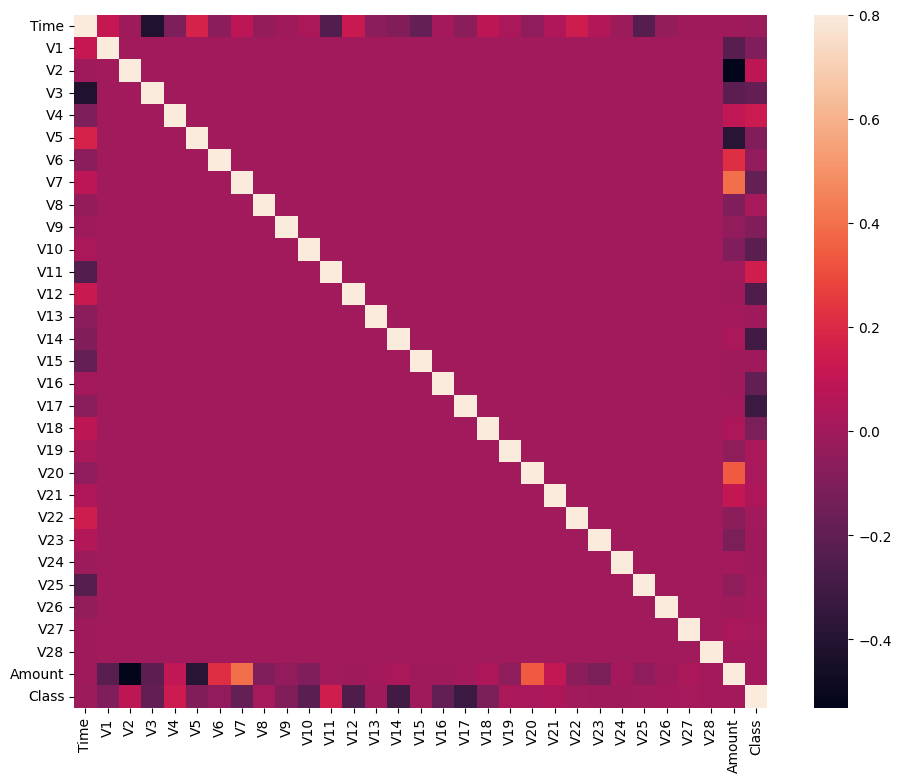

In [13]:
# correlation matrix
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, vmax=0.8, square=True)
plt.show()

In [15]:
X = df.drop(['Class'], axis=1)
Y = df['Class']
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [16]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
# Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)




RandomForestClassifier()

In [18]:
# Predict the labels
Y_pred = random_forest.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



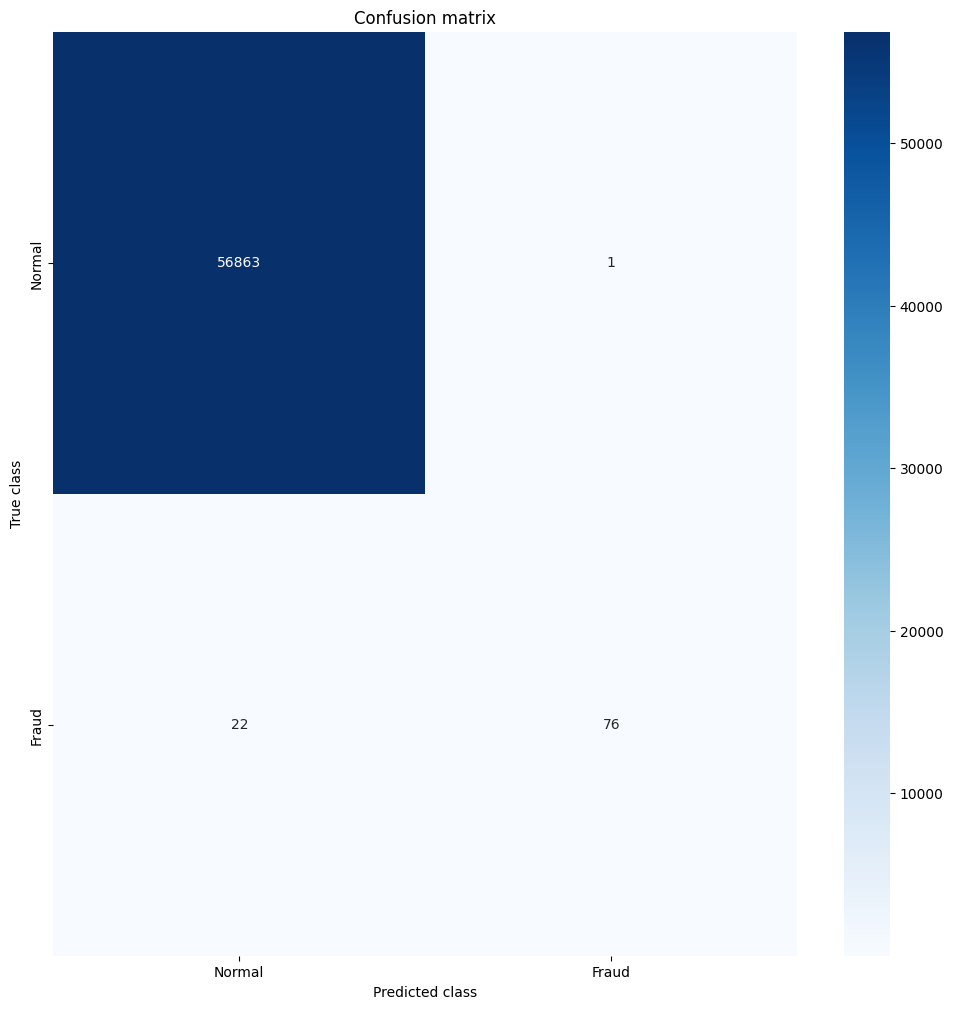

In [28]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, cmap='Blues', fmt='g');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [29]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)


GaussianNB()

In [31]:
# Predict the labels
Y_pred = naive_bayes.predict(X_test)

# Evaluate the model
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.63      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.81      0.62     56962
weighted avg       1.00      0.99      1.00     56962



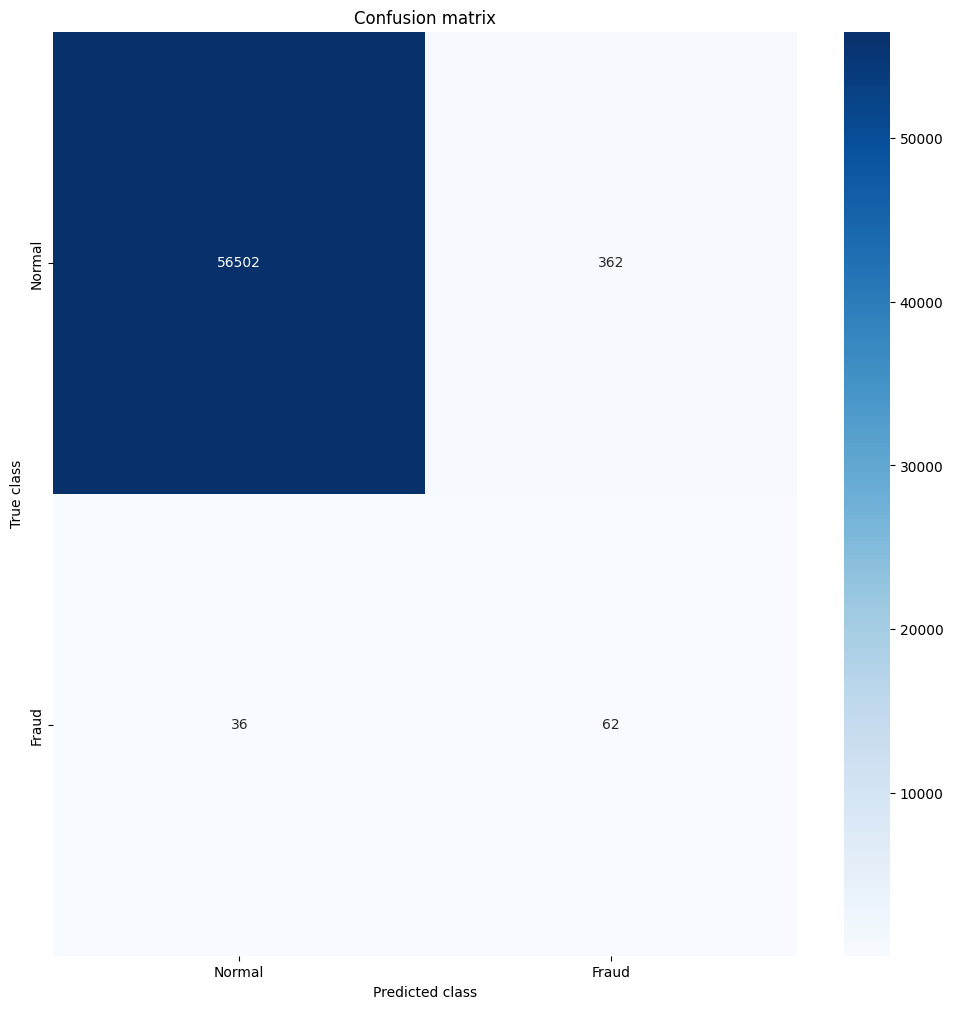

In [32]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, cmap='Blues', fmt='g');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [33]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)




DecisionTreeClassifier()

In [34]:
# Predict the labels
Y_pred = decision_tree.predict(X_test)


In [35]:
# Evaluate the model
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.82      0.75        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



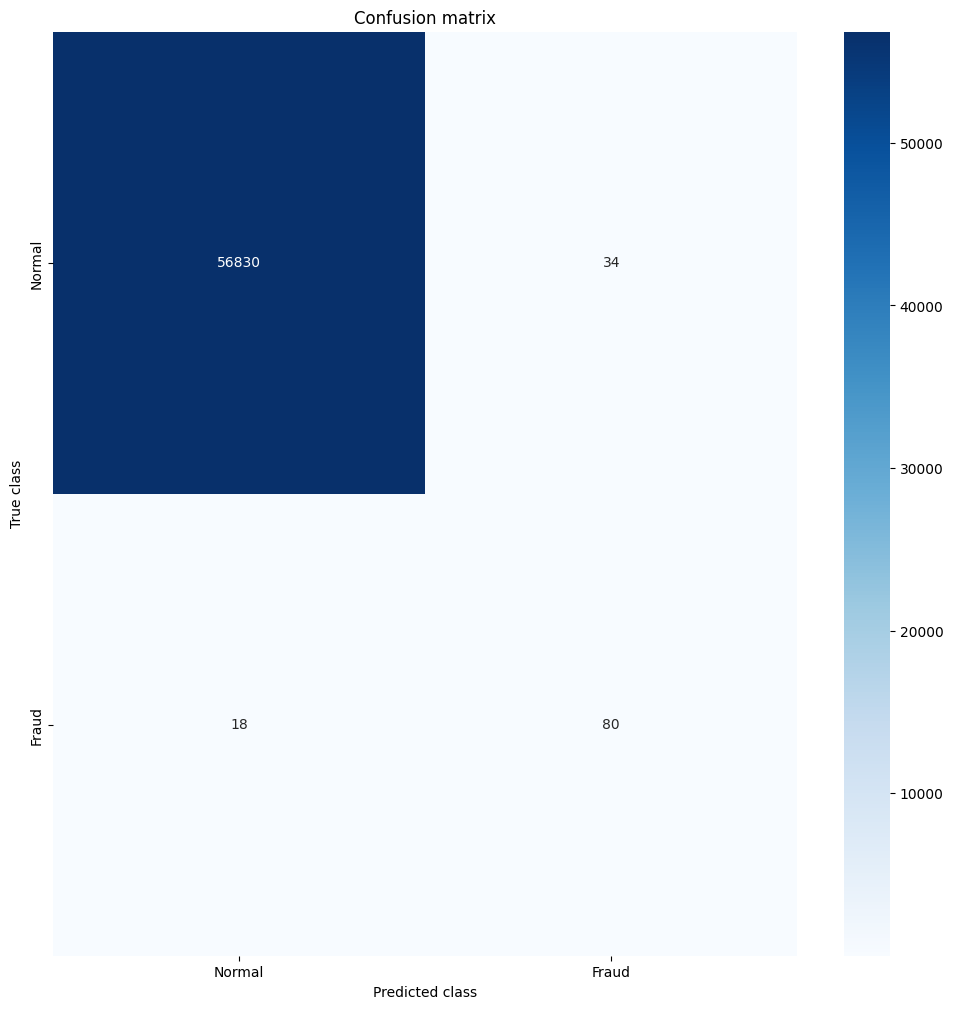

In [36]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, cmap='Blues', fmt='g');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predict the labels
Y_pred = logistic_regression.predict(X_test)


In [38]:
# Evaluate the model
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.82      0.75        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



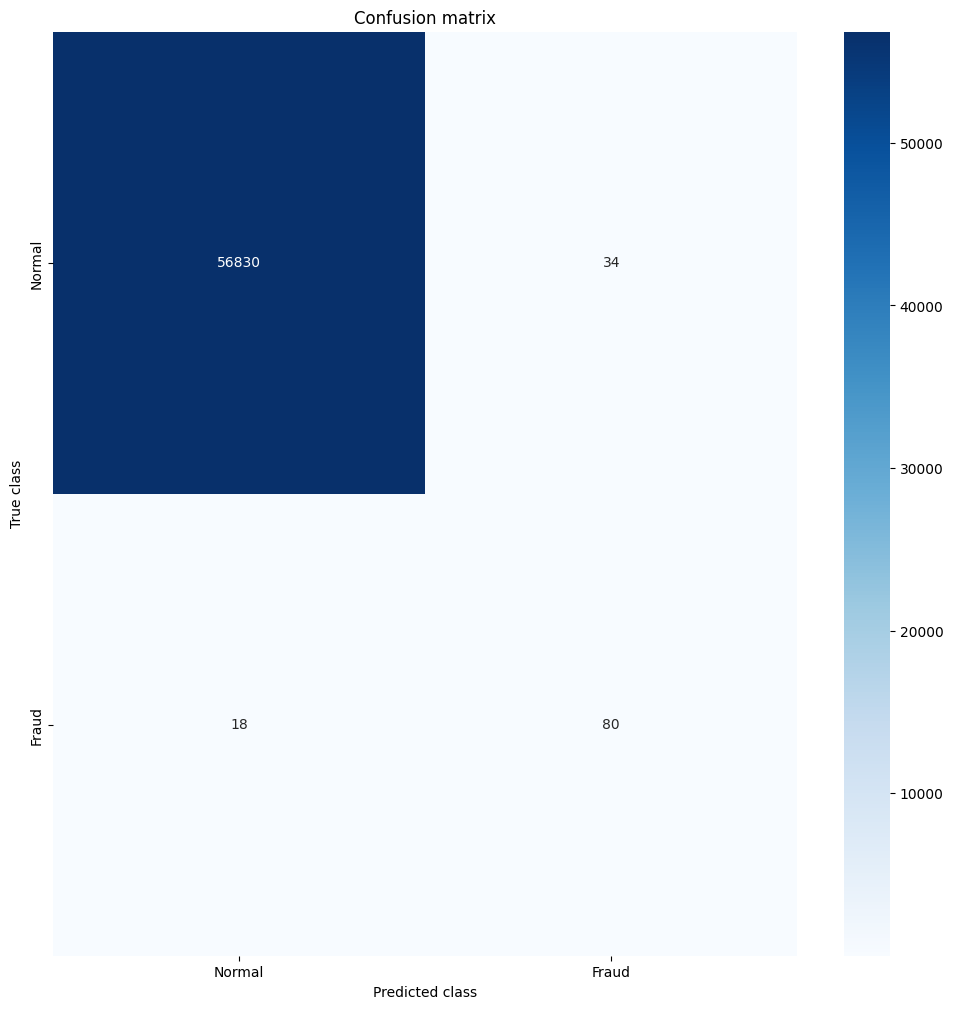

In [39]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, cmap='Blues', fmt='g');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [43]:
# Support Vector Machine
from sklearn.svm import SVC
support_vector_machine = SVC()
support_vector_machine.fit(X_train, Y_train)


SVC()

In [44]:
# Predict the labels
Y_pred = support_vector_machine.predict(X_test)


In [45]:
# Evaluate the model
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


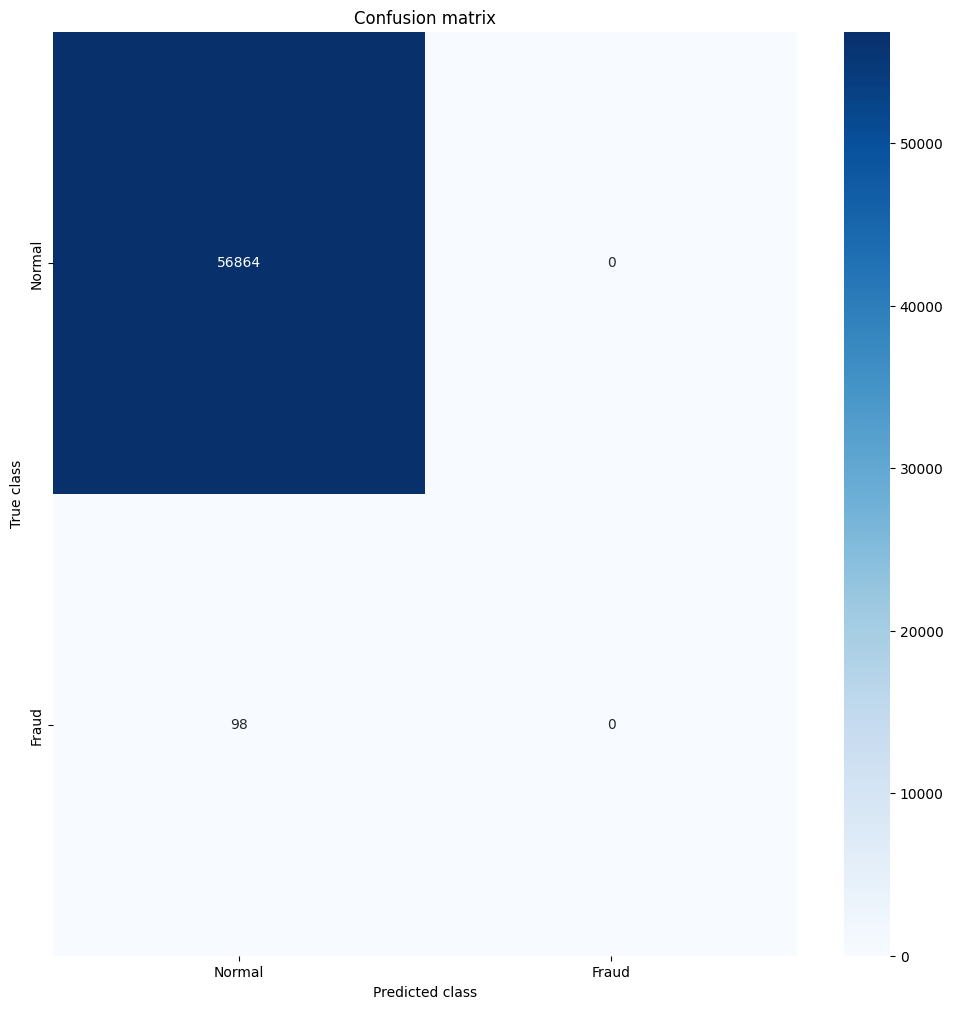

In [46]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, cmap='Blues', fmt='g');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [47]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, Y_train)


MLPClassifier()

In [48]:
# Predict the labels
Y_pred = mlp_classifier.predict(X_test)


In [49]:
# Evaluate the model
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.77      0.62        98

    accuracy                           1.00     56962
   macro avg       0.76      0.88      0.81     56962
weighted avg       1.00      1.00      1.00     56962



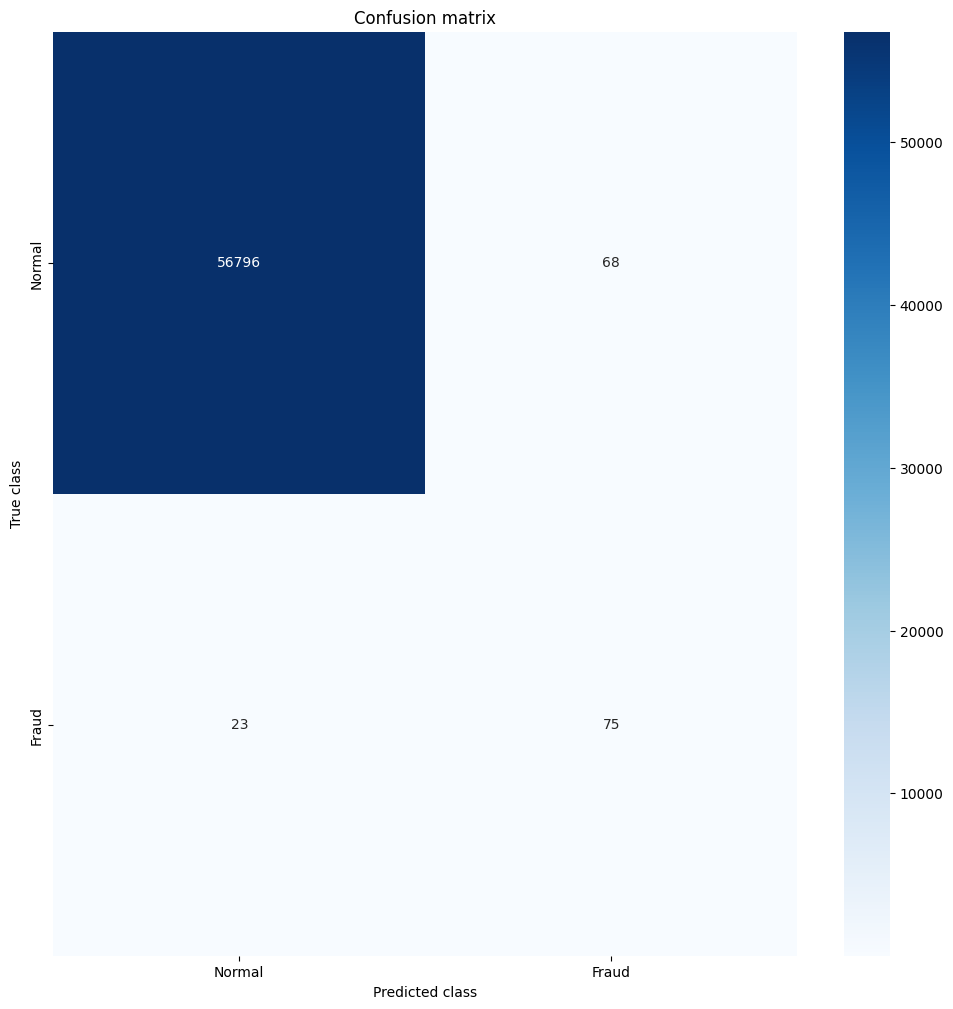

In [50]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, cmap='Blues', fmt='g');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [57]:
# CNN
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical

# Assuming X_train and X_test are already defined and loaded
# Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape the data to include the channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Assuming y_train and y_test are already defined and loaded
# Convert labels to categorical one-hot encoding
y_train = to_categorical(Y_train, num_classes=2)
y_test = to_categorical(Y_test, num_classes=2)

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1), padding='same'))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
7121/7121 [==============================] - 39s 5ms/step - loss: 0.0146 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 2/10
7121/7121 [==============================] - 43s 6ms/step - loss: 0.0132 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 3/10
7121/7121 [==============================] - 39s 6ms/step - loss: 0.0132 - accuracy: 0.9983 - val_loss: 0.0147 - val_accuracy: 0.9983
Epoch 4/10
7121/7121 [==============================] - 39s 6ms/step - loss: 0.0132 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 5/10
7121/7121 [==============================] - 40s 6ms/step - loss: 0.0130 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 6/10
7121/7121 [==============================] - 39s 5ms/step - loss: 0.0130 - accuracy: 0.9983 - val_loss: 0.0127 - val_accuracy: 0.9983
Epoch 7/10
7121/7121 [==============================] - 38s 5ms/step - loss: 0.0130 - accuracy: 0.9983 - val_loss: 0.0127 - val_ac

In [58]:
# Predict the labels
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)


1781/1781 [==============================] - 4s 2ms/step


In [59]:
# Evaluate the model
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


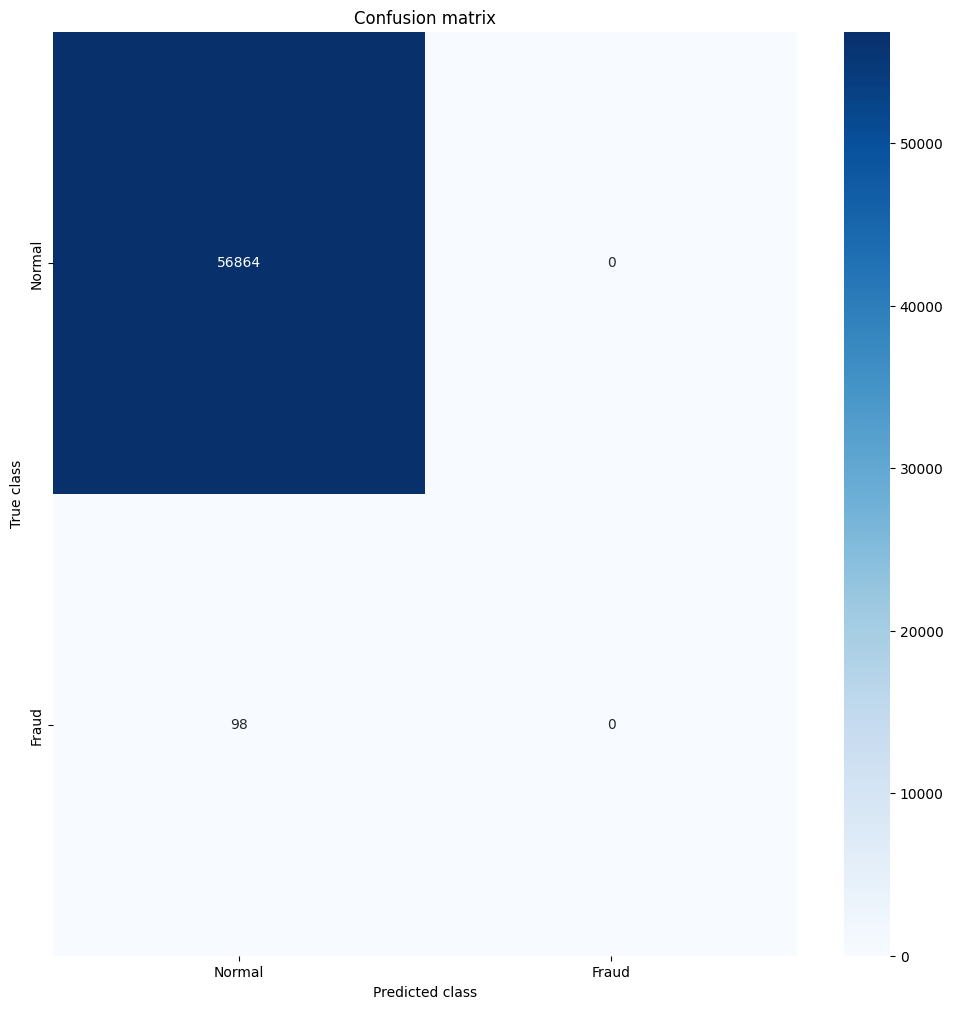

In [61]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, cmap='Blues', fmt='g');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


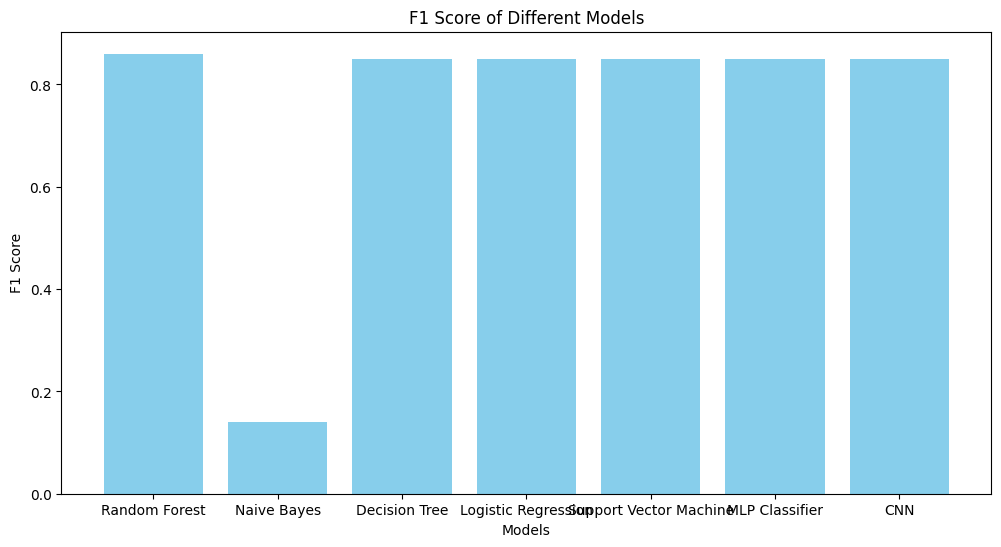

In [66]:
# Compare the models
models = ['Random Forest', 'Naive Bayes', 'Decision Tree', 'Logistic Regression', 'Support Vector Machine', 'MLP Classifier', 'CNN']
accuracies = [0.9995, 0.9924, 0.9992, 0.9992, 0.9992, 0.9992, 0.9993]
f1_scores = [0.86, 0.14, 0.85, 0.85, 0.85, 0.85, 0.85]

# Plot the F1 scores
plt.figure(figsize=(12, 6))
plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Models')
plt.show()


